Osnabrück University - Machine Learning (Summer Term 2021) - Prof. Dr.-Ing. G. Heidemann, Axel Schaffland, Ulf Krumnack

# Exercise Sheet 04: Clustering

## Introduction

This week's sheet should be solved and handed in before the end of **Tuesday, May 18, 2021**. If you need help (and Google and other resources were not enough), feel free to contact your groups designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

In the following tasks we will be relying on numpy. Using the following import we expect it to be in global scope as `np`. Therefore we can, after executing the following cell, use stuff like `np.array` and `np.sqrt`. Check out the [NumPy Reference](http://docs.scipy.org/doc/numpy/reference/index.html) and especially search it using e.g. [Google Site Search](https://www.google.de/search?q=array+site%3Adocs.scipy.org%2Fdoc%2Fnumpy)! You can also try `np.lookfor('keyword search docstrings')` to get help.

In [1]:
import numpy as np
np.lookfor('get array diagonal')

# Try other queries here
# YOUR CODE HERE

Search results for 'get array diagonal'
---------------------------------------
numpy.fill_diagonal
    Fill the main diagonal of the given array of any dimensionality.
numpy.mask_indices
    Return the indices to access (n, n) arrays, given a masking function.
numpy.random.Generator.multivariate_normal
    Draw random samples from a multivariate normal distribution.
numpy.random.RandomState.multivariate_normal
    Draw random samples from a multivariate normal distribution.


## Assignment 0: Math recap (Eigenvectors and Eigenvalues) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is an eigenvector of a matrix/a linear mapping? What are eigenvalues?

YOUR ANSWER HERE

**b)** What is the characteristic polynomial of a matrix? How is it related to eigenvalues? What are algebraic and geometric multiplicity of an eigenvalue?

YOUR ANSWER HERE

**c)** What is the spectrum of a matrix? What does the spectral theorem state?

YOUR ANSWER HERE

**d)** [bonus task]: Numpy/Scipy provide functions to compute eigenvalues. Lookup these functions and apply them to an example.

In [35]:
# YOUR CODE HERE

# Clustering

## Assignment 1: Distance Measures for Clusters [5 Points]

### a) Point and cluster distances

Explain the difference of point and cluster distances and their relation to each other. Give examples.

#### Answer: 
**point distances:**
we calculate the difference between two points in the feature space, different p-norms can be used depending on the problem (eucledian (p2), city block, ...).

**cluster distance:** also includes these distance measures, but at the end it does not only defines the distance between two separate points, but characterizes the overall distance between two clusters. 
Nonetheless we use the "normal distance measures" also for our cluster difference calculation. In the following the different distance measures will be explained: 
minimum distance: we look at the points of different clusters which are closest to each other and take this distance as representative for the cluster distance. E.g. single linkage clustering 
maximum distance: same idea like minimal distance, but with the points with the largest distance. E.g. complete linkage clustering (part of hierarchical clustering)
mean distance: we look at all possible distances between data points of different clusters and take the mean.
centroid distance: we compute the centroid of each cluster and calculate the distance between these centroids

### b) Mean and centroid distance

* Describe how the cluster metrics *mean distance* and *centroid distance* work.
* What formal requirements do they have?
* What is their computational complexity? 
* Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

#### Answer: 

1. Describe how the cluster metrics *mean distance* and *centroid distance* work.
* mean distance: the distance between all possible paris of data points is computed (from two different clusters). After that the average is taken, by dividing it by the total number of pairs. 
* centroid distance: calculate the centroids (intra-cluster mean) of each cluster, and take the distance between the centroids

2. What formal requirements do they have?
* the formal requirement for both could be that we have to define the p-norm which we wanna use for our distance measure
* for mean distance, a distance matrix is sufficient but in order to be able to (re-)calculate the centroids we need numerical attribute values

3. Computational complexity
* $mean$ $distance:$ have to compute all possible distances (point combinations) and store them all in a distance matrix 
* $centroid$ $distance:$ computing the centroids, might be less complex than calculating the mean distance since we do not have to calculate the distance between each combination

4. Give a numerical example of clusters (with cluster size at least 2), where they lead to (a) the same result and (b) different results.

    a = (1,1,1)
    b = (2,2,0) 

    mean = $\frac{1}{9}*(d(1,2)+d(1,2)+d(1,0))$ = $\frac{1}{3}$ 
    mean = $d(\frac{1}{3}*3,\frac{1}{3}*4)$ = $\frac{1}{3}$ 

    a = (1,2,3)
    b = (5,7,4)

    mean = $\frac{1}{9}*(d(1,5)+d(2,7)+d(3,4))$ = $\frac{10}{9}$

    mean = $d(\frac{1}{3}*6,\frac{1}{3}*16)$ = $\frac{10}{3}$ 

### c) Implemention of  mean and centroid distance

Now implement the $d_{mean}$ and $d_{centroid}$ distance from the lecture. Each function expects two clusters each represented by a 2-dimensional numpy array, where the number of columns $n$ reflects the dimensionality of the data space and has to agree for both clusters, while the number of rows $mx$ and $my$ can vary from cluster to cluster. The return value is the respective distance.  Use the Euclidean distance as underlying metric.

Hint: you may consider using the function `scipy.spatial.distance.cdist`. Consult the documentation to find out how to use it.

In [11]:
from scipy.spatial.distance import cdist
import numpy as np

def d_mean(cluster1, cluster2):
    """
    Mean distance between points of two clusters.
   
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The mean distance between the points in the two clusters.
    """
    # YOUR CODE HERE
 

    dis = cdist(cluster1,cluster2,'euclidean') #Y = cdist(XA, XB, 'euclidean')
    final_dis = np.mean(dis)
    

    return final_dis
   



x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21], [5,45,1], [1,12,7]])

epsilon = 1e-3
assert abs(d_mean(x, y) - 22.297) < epsilon, "Result is not correct: {}".format(d_mean(x, y))
assert d_mean(x, y) == d_mean(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_mean(x, y), d_mean(y, x))

In [ ]:
def d_centroid(cluster1, cluster2):
    """
    Calculate the distance between the centroids of two clusters.
    
    Args:
        cluster1 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
        cluster2 (ndarray): Points belonging to cluster 1 of shape (num_points, num_dimensions).
    
    Returns:
        float: The distance between the centroids of two clusters.
    """
    # YOUR CODE HERE
    
    centroid1 = np.mean(cluster1, axis = 0)    
    centroid2 = np.mean(cluster2, axis = 0)
    
    # np.linalg.norm by defualt takes L2 norm. checking the distance
    
    return np.linalg.norm(centroid1 - centroid2)


x = np.array([[1,2,3], [4,5,6], [7,8,9]])
y = np.array([[13,14,15], [16,17,18], [19,20,21]])
z = np.array([[-2,0], [-1,100]])
w = np.array([[2,0], [1,100], [1,-100], [1,-20]])

epsilon = 1e-3
assert abs(d_centroid(x, y) - 20.785) < epsilon, "Result is not correct: {}".format(d_centroid(x, y))
assert abs(d_centroid(z, w) - 55.069) < epsilon, "Result is not correct: {}".format(d_centroid(z, w))
assert d_centroid(x, y) == d_centroid(y, x), "X,Y is not equal to Y,X: {} != {}".format(d_centroid(x, y), d_centroid(y, x)) 

 ## Assignment 2: Hierarchical Clustering [6 Points]
 
 Consider the following matrix of distances
 
|       |  a  |  b  |  c  |  d  |  e  |
|-------|-----|-----|-----|-----|-----|
| **a** |  0  |  2  |  6  |  10 |  9  |
| **b** |  2  |  0  |  5  |  9  |  8  |
| **c** |  6  |  5  |  0  |  4  |  5  |
| **d** |  10 |  9  |  4  |  0  |  3  |
| **e** |  9  |  8  |  5  |  3  |  0  |
 

### a) Perform agglomerative clustering

Do *agglomerative* average linkage clustering by hand (i.e. employing the *mean* cluster distance). Analyze how many alternatives you have to consider at each step.



<img src="Screenshot%202021-05-17%20211458.png" />

### b) Perform divisive clustering

Now try to do divisive average linkage clustering. Again, analyze how many splits are possible in the first step? Think of a strategy that allows to reduce this number and use this in your computation.

<img src="Screenshot%202021-05-17%20211326.png" />

### c) Linkage criteria

In the following you find implementations for single- and complete-linkage clustering. Take a look at the code  and answer the question posted below. You may of course change parameters and try it out on different datasets (`points.txt` & `clusterData.txt` are provided).

Note that for performance reasons the code differs from the lecture's pseudocode (ML-05 Slide 8), but in general it does the same.

In [93]:
from scipy.spatial.distance import cdist

def linkage(data, k=5, complete=False):
    """
    Runs single or complete linkage clustering.
    
    Args:
        data (ndarray): Data points to be clustered in an array with shape (num_points, 2).
        k (int): Number of clusters.
        complete (bool): Whether to run complete linkage clustering.
        
    Returns:
        ndarray: The cluster labels for each data point. Shape is (num_points).
    """
    # Initially all points are their own cluster.
    labels = np.arange(len(data))

    # Calculate distance between all points.
    # Also removing half of the matrix because 
    # its symmetrical along the diagonal.
    dst = np.tril(cdist(data, data))

    while len(set(labels)) > k:
        # Get the lowest distance of two points which
        # do not have the same label.
        r, c = np.where(dst == np.min(dst[dst > 0]))
        
        # Ignore the case when there are multiple with
        # equally smallest distance.
        r = r[0]
        c = c[0]

        # The two points are now in the same cluster,
        # so they have a distance of 0 now.
        dst[r, c] = 0

        # Make the two clusters have the same label.
        labels[labels == labels[r]] = labels[c]

        # Check if we want to do complete linkage clustering.
        if complete:
            # Update the distances of the points which are not in the same cluster.
            for i in np.nonzero(dst[r, :] > 0)[0]:
                dst[r, i] = np.max(cdist(data[i, None], data[labels == labels[r], :]))

            # The distances to c are now the same as to r, so we can just
            # set them to zero - would be duplicates otherwise.
            dst[:, c] = 0

    return labels

Single Linkage Clustering:
Label:   10,  Occurence:   71
Label:   48,  Occurence:    1
Label:   62,  Occurence:   75
Label:  107,  Occurence:   27
Label:  118,  Occurence:    1
Complete Linkage Clustering:
Label:   10,  Occurence:   42
Label:   15,  Occurence:   40
Label:  104,  Occurence:   29
Label:  118,  Occurence:   37
Label:  136,  Occurence:   27


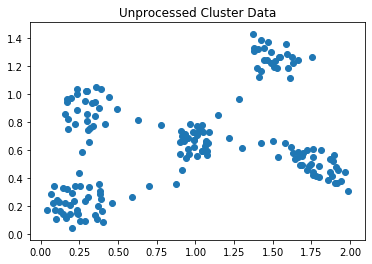

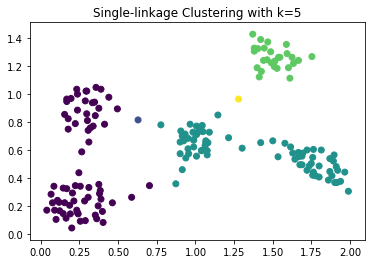

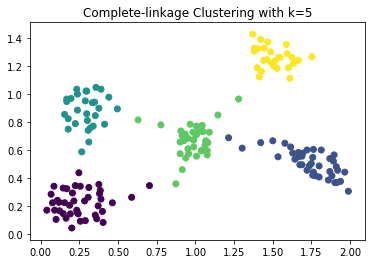

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Read the data.
data = np.loadtxt('points.txt')

# Show unprocessed data set.
fig_cluster = plt.figure()
plt.scatter(data[:, 0], data[:, 1])
plt.title('Unprocessed Cluster Data')
fig_cluster.canvas.draw()

# Apply Single Linkage Clustering
labels = linkage(data, k=5, complete=False)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Single Linkage Clustering:")
# Print the unqiue labels and their occurence
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
# Replace labels by continuous values starting from 1 for discernible colors in plot
labels = np.arange(1,unique.size+1)[inverse]
fig_single = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Single-linkage Clustering with k=5')
fig_single.canvas.draw()


# Apply Complete Linkage Clustering
labels = linkage(data, k=5, complete=True)
unique, inverse, counts = np.unique(labels, return_inverse=True, return_counts=True)
print("Complete Linkage Clustering:")
for u, c in zip(unique, counts):
    print("Label: {:4},  Occurence: {:4}".format(u, c))    
labels = np.arange(1,unique.size+1)[inverse]
fig_complete = plt.figure()
plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.title('Complete-linkage Clustering with k=5')
fig_complete.canvas.draw()



# Test different parameters above
# YOUR CODE HERE

What is the difference between single- and complete-linkage clustering and which is the better solution given the dataset?

#### Answer: 

The **distance** **metrics** are different between the two clustering methods.
Single linkage clustering defines the distance between two clusters by the minimum distance between the two closest data points of two clusters.
Complete linkage defines the distance between two clusters by the distance between data points which have the largest distance from each other.
These different methods lead to different results. 
Since single linkage clustering always looks at the minimal distances it tends to chain clusters, which have some data points close to each other, resulting in a longish cluster.
Whereas complete linkage looks at the minimal  maximum distance, thus combining clusters which have low maximum distance leading to a rather compact, round clusters.
Since our data in the dataset is quite widely distributed with some (five) round accumulations, the complete linkage clustering fits the nature of the data distribution better.
We get five clusters which consist (on average) of a quite similar amount of elements.
That is a quite reasonable result when looking at the distribution of our data.

## Assignment 3: k-means Clustering [9 Points]

### a) Implement k-means clustering. Plot the results for $k = 7$ and $k = 3$ in colorful scatter plots.

How could one handle situations when one or more clusters end up containing 0 elements? Handle these situtation in your code.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


def kmeans(data, k=3):
    """
    Applies kmeans clustering to the data using k initial clusters.
    data is expected to be a numpy array of size n*2, 
    n being the amount of observations in the data. This function returns
    the centroids and the labels for the clusters data (1,1,3,5,5,5,...)
    """
    # YOUR CODE HERE
    
    
    
    # Initializing centroids are k random samples from the data.
    
    
    # selecting k number of randonm centeriods( will be using for matching lables)
    new_centroids = data[np.random.randint(0, data.shape[0], k)]   
    old_centroids = np.zeros(new_centroids.shape)
    
    
    
    # Initial labels of data shape to zero. this can be anything.
    labels = np.zeros(data.shape[0])
    #print(labels)
    
        
    # upper bound for the itter
    itter = 0
    
    # np.finfo(float).eps Machine limits for floating point types.
    #checking if any changes is distance between centriods data
    
    while np.any(np.abs(new_centroids - old_centroids)) and itter < 100:
        # Keep count of iterations and remember current centroids for change calculation.
        itter = itter + 1
        # Copying the centroids for checking the break condition.
        old_centroids = np.copy(new_centroids)
        
        # Calculate new labels. 
        #Labels are the index of their minimal distance to any centroid .
        
        #print(cdist(new_centroids, data)[2])
        
        labels = np.argmin(cdist(new_centroids, data), axis=0)
        #print(labels)
        
       
        
        # Update centroids using the new cluster labels.
        # for k = 3 and k =7
        for n in range(k):            
            
            # Check for empty clusters for k numbers
            if np.any(labels == n):
                #print(data[labels == n] )
                matches = data[labels == n]                               
                # compute and move its centroid to new mean.
                new_centroids[n, :] = np.mean(matches, axis=0)

    
    print( f"the Algorithm took ' {itter} ' number of itteration to converge the data where k = {k}")
   

    

    return labels, new_centroids

the Algorithm took ' 9 ' number of itteration to converge the data where k = 3
the Algorithm took ' 17 ' number of itteration to converge the data where k = 7


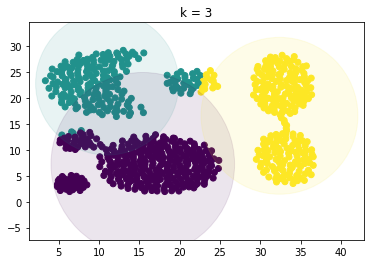

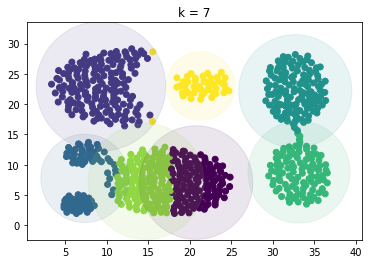

In [7]:
%matplotlib inline


data = np.loadtxt('clusterData.txt')


# Test different ks here
# YOUR CODE HERE
for k in [3,7]:
#for k in [7]*5:    
    labels, centroids = kmeans(data, k)

    kmeans_fig = plt.figure('k-means with k={}'.format(k))
    plt.scatter(data[:,0], data[:,1], c=labels)
    plt.scatter(centroids[:,0], centroids[:,1], 
                c=list(set(labels)), alpha=.1, marker='o',
                s=np.array([len(labels[labels==label]) for label in set(labels)])*100)
    plt.title('k = '+str(k))
    kmeans_fig.canvas.draw()

plt.show()
    
    

### b) Why might the clustering for k=7 not look optimal? 

#### Answer :

Due to nature of the data and its distribution it is more reasonable to choose 3 clusters and not a fine grained clustering like the one we get with k=7. 
Having too many clusters can lead to artificial boundaries within a data cluster (, thus resulting in an overall unnatural clustering of our data. Thats why in our example k=7 does not look optimal. And it also increases computational cost which is unnecessary in this case.
